In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511760, 30)
After OverSampling, the shape of train_y: (511760,) 

After OverSampling, counts of label '1': 255877
After OverSampling, counts of label '0': 255883
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

511760/511760 [==============================] - 24s 47us/step - loss: 12.2021 - rec_loss: 19.4158 - kl_loss: 4.0181 - val_loss: 13.3315 - val_rec_loss: 23.1282 - val_kl_loss: 2.9643
Epoch 17/150
511760/511760 [==============================] - 24s 47us/step - loss: 12.1467 - rec_loss: 19.2716 - kl_loss: 4.0379 - val_loss: 13.5901 - val_rec_loss: 23.8003 - val_kl_loss: 2.8227
Epoch 18/150
511760/511760 [==============================] - 24s 47us/step - loss: 12.0491 - rec_loss: 19.0992 - kl_loss: 4.0321 - val_loss: 13.3138 - val_rec_loss: 23.2172 - val_kl_loss: 2.8628
Epoch 19/150
511760/511760 [==============================] - 24s 47us/step - loss: 12.0144 - rec_loss: 19.0390 - kl_loss: 4.0396 - val_loss: 13.1714 - val_rec_loss: 23.0240 - val_kl_loss: 2.7970
Epoch 20/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.9016 - rec_loss: 18.8241 - kl_loss: 4.0431 - val_loss: 13.3423 - val_rec_loss: 23.3477 - val_kl_loss: 2.7994
Epoch 21/150
511760/511760 [=====

Epoch 58/150
511760/511760 [==============================] - 24s 46us/step - loss: 11.5352 - rec_loss: 18.0489 - kl_loss: 4.1375 - val_loss: 13.0386 - val_rec_loss: 22.5456 - val_kl_loss: 3.0266
Epoch 59/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.7223 - rec_loss: 18.4241 - kl_loss: 4.1452 - val_loss: 13.3608 - val_rec_loss: 23.1595 - val_kl_loss: 3.0526
Epoch 60/150
511760/511760 [==============================] - 24s 46us/step - loss: 11.8144 - rec_loss: 18.5772 - kl_loss: 4.1524 - val_loss: 13.0785 - val_rec_loss: 22.6320 - val_kl_loss: 3.0035
Epoch 61/150
511760/511760 [==============================] - 24s 46us/step - loss: 11.7328 - rec_loss: 18.4155 - kl_loss: 4.1570 - val_loss: 12.8920 - val_rec_loss: 22.2069 - val_kl_loss: 3.0567
Epoch 62/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.6497 - rec_loss: 18.2491 - kl_loss: 4.1477 - val_loss: 12.9695 - val_rec_loss: 22.3545 - val_kl_loss: 3.0339
Epoch 63/150
511760/

Epoch 100/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.7691 - rec_loss: 18.5324 - kl_loss: 4.1457 - val_loss: 12.8607 - val_rec_loss: 22.1718 - val_kl_loss: 3.0095
Epoch 101/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.7879 - rec_loss: 18.5564 - kl_loss: 4.1483 - val_loss: 13.0685 - val_rec_loss: 22.5378 - val_kl_loss: 3.0589
Epoch 102/150
511760/511760 [==============================] - 24s 46us/step - loss: 11.7919 - rec_loss: 18.5441 - kl_loss: 4.1464 - val_loss: 13.0615 - val_rec_loss: 22.5985 - val_kl_loss: 2.9880
Epoch 103/150
511760/511760 [==============================] - 24s 46us/step - loss: 11.6922 - rec_loss: 18.3613 - kl_loss: 4.1510 - val_loss: 12.8154 - val_rec_loss: 22.0912 - val_kl_loss: 2.9968
Epoch 104/150
511760/511760 [==============================] - 24s 47us/step - loss: 11.6369 - rec_loss: 18.2672 - kl_loss: 4.1523 - val_loss: 13.2849 - val_rec_loss: 22.8104 - val_kl_loss: 3.2479
Epoch 105/150
5

511760/511760 [==============================] - 27s 53us/step - loss: 11.5440 - rec_loss: 18.0406 - kl_loss: 4.1861 - val_loss: 12.9527 - val_rec_loss: 22.3628 - val_kl_loss: 2.9974
Epoch 142/150
511760/511760 [==============================] - 26s 50us/step - loss: 11.5086 - rec_loss: 17.9896 - kl_loss: 4.1725 - val_loss: 13.0715 - val_rec_loss: 22.5186 - val_kl_loss: 3.1026
Epoch 143/150
511760/511760 [==============================] - 24s 48us/step - loss: 11.5549 - rec_loss: 18.0735 - kl_loss: 4.1869 - val_loss: 13.5827 - val_rec_loss: 23.5002 - val_kl_loss: 3.1325
Epoch 144/150
511760/511760 [==============================] - 25s 49us/step - loss: 11.5464 - rec_loss: 18.0667 - kl_loss: 4.1901 - val_loss: 13.1473 - val_rec_loss: 22.5727 - val_kl_loss: 3.1966
Epoch 145/150
511760/511760 [==============================] - 25s 48us/step - loss: 11.5413 - rec_loss: 18.0506 - kl_loss: 4.1940 - val_loss: 13.0021 - val_rec_loss: 22.4679 - val_kl_loss: 3.0011
Epoch 146/150
511760/511760 [

Epoch 42/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3249 - accuracy: 0.8571 - val_loss: 0.2919 - val_accuracy: 0.8769
Epoch 43/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3252 - accuracy: 0.8576 - val_loss: 0.2827 - val_accuracy: 0.8750
Epoch 44/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3252 - accuracy: 0.8570 - val_loss: 0.2889 - val_accuracy: 0.8771
Epoch 45/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3248 - accuracy: 0.8576 - val_loss: 0.2964 - val_accuracy: 0.8741
Epoch 46/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3252 - accuracy: 0.8576 - val_loss: 0.2877 - val_accuracy: 0.8812
Epoch 47/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.3249 - accuracy: 0.8576 - val_loss: 0.2892 - val_accuracy: 0.8771
Epoch 48/50
511760/511760 [==============================] - 86s 168us/step - loss: 0.32

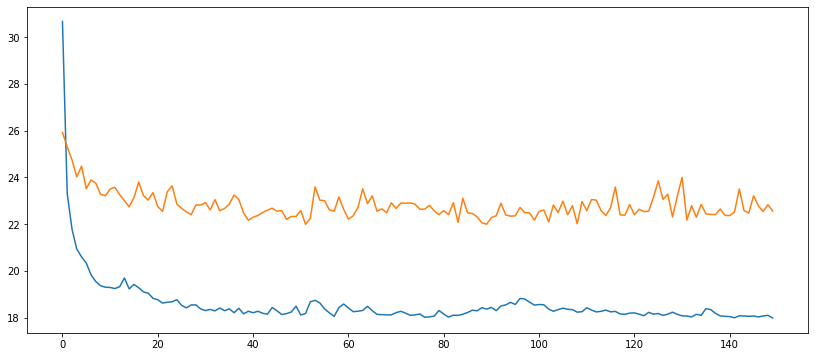

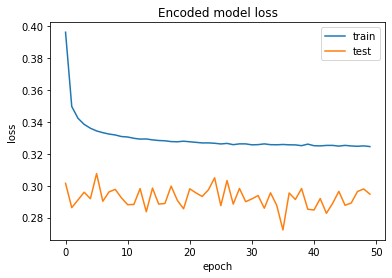

Overall accuracy of Convolutional Neural Network model: 0.8793230574769144


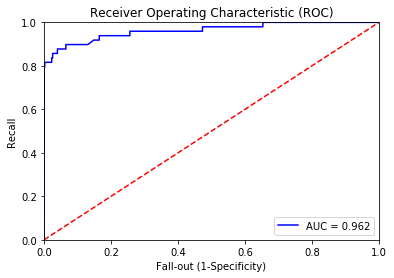

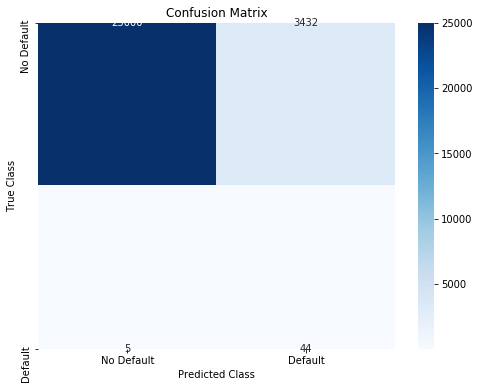

AUC(ROC): 0.888625061729813
Precision: 0.012658227848101266
Recall: 0.8979591836734694
F1 score: 0.0249645390070922
False positives: 3432
True positives: 44
False negatives: 5
True negatives: 25000
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511729, 30)
After OverSampling, the shape of train_y: (511729,) 

After OverSampling, counts of label '1': 255846
After OverSampling, counts of label '0': 255883
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

511729/511729 [==============================] - 25s 48us/step - loss: 12.1497 - rec_loss: 19.3569 - kl_loss: 3.9405 - val_loss: 13.0900 - val_rec_loss: 23.0858 - val_kl_loss: 2.6013
Epoch 17/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.1626 - rec_loss: 19.3923 - kl_loss: 3.9400 - val_loss: 13.0654 - val_rec_loss: 22.8860 - val_kl_loss: 2.7372
Epoch 18/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.1218 - rec_loss: 19.3154 - kl_loss: 3.9469 - val_loss: 13.2164 - val_rec_loss: 23.2894 - val_kl_loss: 2.6455
Epoch 19/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.0359 - rec_loss: 19.1607 - kl_loss: 3.9469 - val_loss: 13.1699 - val_rec_loss: 23.2675 - val_kl_loss: 2.6105
Epoch 20/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.0292 - rec_loss: 19.1458 - kl_loss: 3.9499 - val_loss: 13.0614 - val_rec_loss: 23.0204 - val_kl_loss: 2.6230
Epoch 21/150
511729/511729 [=====

Epoch 58/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.9032 - rec_loss: 18.8632 - kl_loss: 4.0445 - val_loss: 12.6579 - val_rec_loss: 22.0707 - val_kl_loss: 2.7334
Epoch 59/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.8505 - rec_loss: 18.7378 - kl_loss: 4.0479 - val_loss: 12.6533 - val_rec_loss: 21.9555 - val_kl_loss: 2.8471
Epoch 60/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.8549 - rec_loss: 18.7738 - kl_loss: 4.0394 - val_loss: 12.5934 - val_rec_loss: 21.9843 - val_kl_loss: 2.7030
Epoch 61/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.8996 - rec_loss: 18.8492 - kl_loss: 4.0487 - val_loss: 12.5988 - val_rec_loss: 21.9206 - val_kl_loss: 2.7534
Epoch 62/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.7760 - rec_loss: 18.6098 - kl_loss: 4.0371 - val_loss: 12.7343 - val_rec_loss: 22.1690 - val_kl_loss: 2.7841
Epoch 63/150
511729/

Epoch 100/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.0310 - rec_loss: 19.0335 - kl_loss: 4.1350 - val_loss: 12.6804 - val_rec_loss: 22.0976 - val_kl_loss: 2.7563
Epoch 101/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.0452 - rec_loss: 19.0537 - kl_loss: 4.1341 - val_loss: 12.7754 - val_rec_loss: 22.1963 - val_kl_loss: 2.8296
Epoch 102/150
511729/511729 [==============================] - 25s 48us/step - loss: 12.0298 - rec_loss: 19.0293 - kl_loss: 4.1257 - val_loss: 12.8568 - val_rec_loss: 22.4157 - val_kl_loss: 2.7719
Epoch 103/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.9579 - rec_loss: 18.8743 - kl_loss: 4.1317 - val_loss: 12.8100 - val_rec_loss: 22.2188 - val_kl_loss: 2.8446
Epoch 104/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.9599 - rec_loss: 18.8975 - kl_loss: 4.1305 - val_loss: 12.7225 - val_rec_loss: 22.0933 - val_kl_loss: 2.8351
Epoch 105/150
5

511729/511729 [==============================] - 25s 48us/step - loss: 11.7231 - rec_loss: 18.3820 - kl_loss: 4.1858 - val_loss: 12.6977 - val_rec_loss: 21.9393 - val_kl_loss: 2.9403
Epoch 142/150
511729/511729 [==============================] - 24s 48us/step - loss: 11.7023 - rec_loss: 18.3378 - kl_loss: 4.1882 - val_loss: 12.5814 - val_rec_loss: 21.7036 - val_kl_loss: 2.9340
Epoch 143/150
511729/511729 [==============================] - 24s 48us/step - loss: 11.7661 - rec_loss: 18.4544 - kl_loss: 4.2013 - val_loss: 12.6842 - val_rec_loss: 21.8743 - val_kl_loss: 2.9701
Epoch 144/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.7584 - rec_loss: 18.4173 - kl_loss: 4.1850 - val_loss: 12.7038 - val_rec_loss: 22.0688 - val_kl_loss: 2.7619
Epoch 145/150
511729/511729 [==============================] - 25s 48us/step - loss: 11.7669 - rec_loss: 18.4352 - kl_loss: 4.1788 - val_loss: 12.7588 - val_rec_loss: 22.0423 - val_kl_loss: 2.9240
Epoch 146/150
511729/511729 [

Epoch 42/50
511729/511729 [==============================] - 89s 173us/step - loss: 0.3483 - accuracy: 0.8516 - val_loss: 0.2885 - val_accuracy: 0.8741
Epoch 43/50
511729/511729 [==============================] - 89s 173us/step - loss: 0.3476 - accuracy: 0.8515 - val_loss: 0.2855 - val_accuracy: 0.8756
Epoch 44/50
511729/511729 [==============================] - 89s 173us/step - loss: 0.3478 - accuracy: 0.8517 - val_loss: 0.2820 - val_accuracy: 0.8754
Epoch 45/50
511729/511729 [==============================] - 89s 173us/step - loss: 0.3477 - accuracy: 0.8521 - val_loss: 0.2712 - val_accuracy: 0.8734
Epoch 46/50
511729/511729 [==============================] - 88s 173us/step - loss: 0.3478 - accuracy: 0.8517 - val_loss: 0.2875 - val_accuracy: 0.8711
Epoch 47/50
511729/511729 [==============================] - 89s 174us/step - loss: 0.3475 - accuracy: 0.8515 - val_loss: 0.2909 - val_accuracy: 0.8676
Epoch 48/50
511729/511729 [==============================] - 90s 175us/step - loss: 0.34

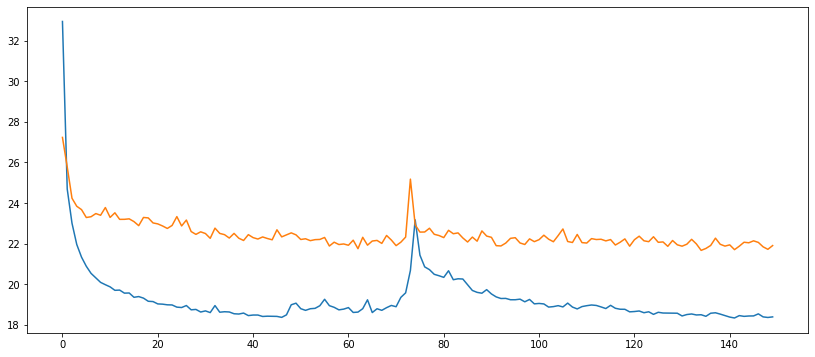

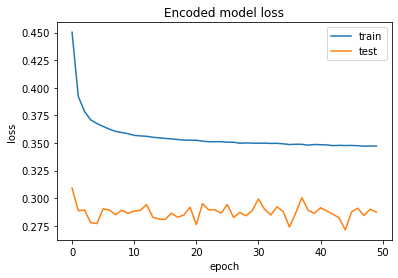

Overall accuracy of Convolutional Neural Network model: 0.8764439450861978


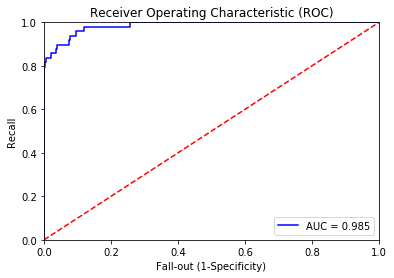

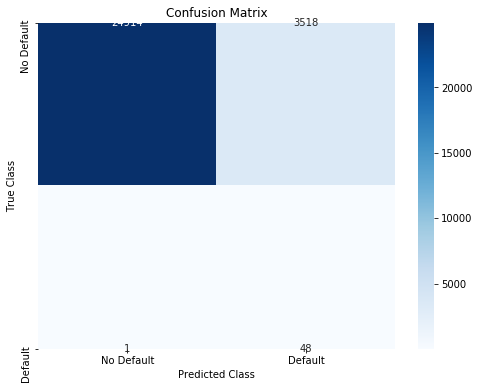

AUC(ROC): 0.927929007843993
Precision: 0.01346045989904655
Recall: 0.9795918367346939
F1 score: 0.026556016597510373
False positives: 3518
True positives: 48
False negatives: 1
True negatives: 24914
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511802, 30)
After OverSampling, the shape of train_y: (511802,) 

After OverSampling, counts of label '1': 255919
After OverSampling, counts of label '0': 255883
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

511802/511802 [==============================] - 26s 51us/step - loss: 11.6667 - rec_loss: 18.3369 - kl_loss: 4.1668 - val_loss: 12.4911 - val_rec_loss: 21.5772 - val_kl_loss: 2.9438
Epoch 17/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.6057 - rec_loss: 18.2143 - kl_loss: 4.1634 - val_loss: 12.2633 - val_rec_loss: 21.0456 - val_kl_loss: 3.0292
Epoch 18/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.6447 - rec_loss: 18.2926 - kl_loss: 4.1728 - val_loss: 12.4042 - val_rec_loss: 21.2602 - val_kl_loss: 3.0752
Epoch 19/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.6396 - rec_loss: 18.2596 - kl_loss: 4.1726 - val_loss: 12.3733 - val_rec_loss: 21.2082 - val_kl_loss: 3.0704
Epoch 20/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.5725 - rec_loss: 18.1346 - kl_loss: 4.1779 - val_loss: 12.4120 - val_rec_loss: 21.3588 - val_kl_loss: 3.0058
Epoch 21/150
511802/511802 [=====

Epoch 58/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.2677 - rec_loss: 17.4867 - kl_loss: 4.2266 - val_loss: 12.3884 - val_rec_loss: 21.1414 - val_kl_loss: 3.1350
Epoch 59/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.3285 - rec_loss: 17.5960 - kl_loss: 4.2358 - val_loss: 12.2247 - val_rec_loss: 20.7889 - val_kl_loss: 3.1689
Epoch 60/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.3990 - rec_loss: 17.7595 - kl_loss: 4.2118 - val_loss: 12.3776 - val_rec_loss: 21.1918 - val_kl_loss: 3.0551
Epoch 61/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.3594 - rec_loss: 17.6787 - kl_loss: 4.2067 - val_loss: 12.3710 - val_rec_loss: 21.1542 - val_kl_loss: 3.0815
Epoch 62/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.2912 - rec_loss: 17.5300 - kl_loss: 4.2256 - val_loss: 12.2926 - val_rec_loss: 20.9230 - val_kl_loss: 3.1678
Epoch 63/150
511802/

Epoch 100/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.1489 - rec_loss: 17.2409 - kl_loss: 4.2235 - val_loss: 12.3588 - val_rec_loss: 21.0806 - val_kl_loss: 3.1456
Epoch 101/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.1314 - rec_loss: 17.2166 - kl_loss: 4.2246 - val_loss: 12.2907 - val_rec_loss: 21.0122 - val_kl_loss: 3.0929
Epoch 102/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.2399 - rec_loss: 17.4209 - kl_loss: 4.2400 - val_loss: 12.0625 - val_rec_loss: 20.5788 - val_kl_loss: 3.0553
Epoch 103/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.2155 - rec_loss: 17.3763 - kl_loss: 4.2313 - val_loss: 12.2467 - val_rec_loss: 20.9115 - val_kl_loss: 3.0992
Epoch 104/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.2091 - rec_loss: 17.3532 - kl_loss: 4.2402 - val_loss: 12.1911 - val_rec_loss: 20.8268 - val_kl_loss: 3.0629
Epoch 105/150
5

511802/511802 [==============================] - 26s 51us/step - loss: 11.1066 - rec_loss: 17.1909 - kl_loss: 4.2333 - val_loss: 12.3218 - val_rec_loss: 21.0063 - val_kl_loss: 3.1772
Epoch 142/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.0839 - rec_loss: 17.1410 - kl_loss: 4.2431 - val_loss: 12.0769 - val_rec_loss: 20.6481 - val_kl_loss: 3.0228
Epoch 143/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.1113 - rec_loss: 17.1858 - kl_loss: 4.2413 - val_loss: 12.3046 - val_rec_loss: 20.9604 - val_kl_loss: 3.1710
Epoch 144/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.0951 - rec_loss: 17.1620 - kl_loss: 4.2361 - val_loss: 12.2208 - val_rec_loss: 20.9698 - val_kl_loss: 3.0003
Epoch 145/150
511802/511802 [==============================] - 26s 51us/step - loss: 11.0934 - rec_loss: 17.1614 - kl_loss: 4.2362 - val_loss: 12.1881 - val_rec_loss: 20.9426 - val_kl_loss: 2.9553
Epoch 146/150
511802/511802 [

511802/511802 [==============================] - 91s 178us/step - loss: 0.3091 - accuracy: 0.8698 - val_loss: 0.2822 - val_accuracy: 0.8593
Epoch 42/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3086 - accuracy: 0.8697 - val_loss: 0.2841 - val_accuracy: 0.8597
Epoch 43/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3088 - accuracy: 0.8697 - val_loss: 0.2917 - val_accuracy: 0.8594
Epoch 44/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3087 - accuracy: 0.8697 - val_loss: 0.2796 - val_accuracy: 0.8607
Epoch 45/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3088 - accuracy: 0.8698 - val_loss: 0.2811 - val_accuracy: 0.8605
Epoch 46/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3089 - accuracy: 0.8694 - val_loss: 0.2750 - val_accuracy: 0.8603
Epoch 47/50
511802/511802 [==============================] - 91s 178us/step - loss: 0.3085 - accurac

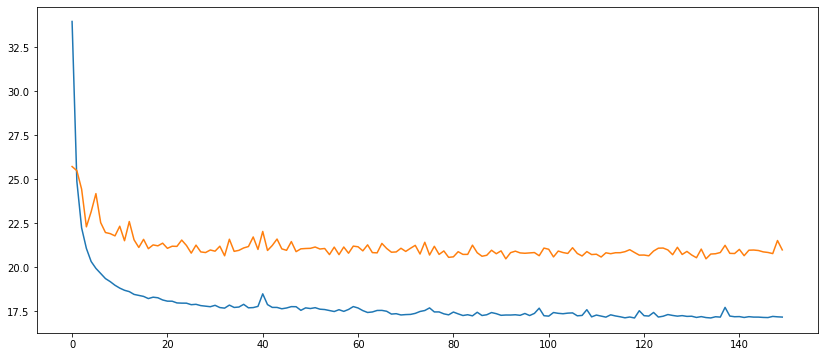

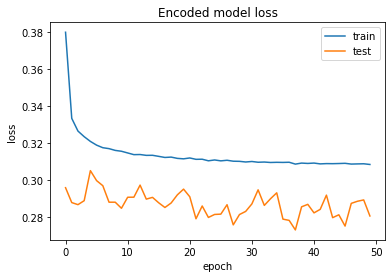

Overall accuracy of Convolutional Neural Network model: 0.8627506056669358


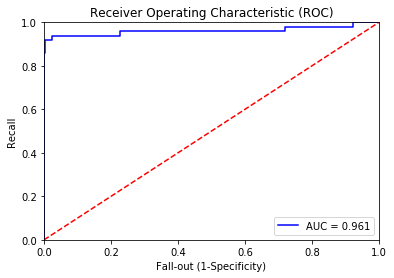

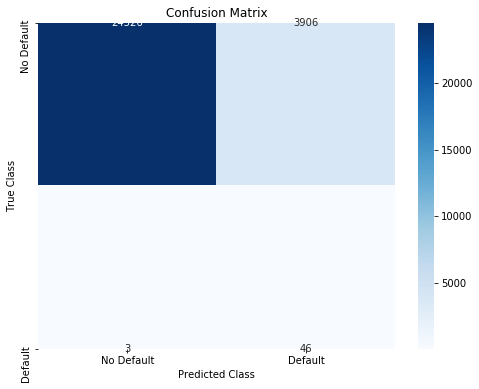

AUC(ROC): 0.9006975468859464
Precision: 0.011639676113360324
Recall: 0.9387755102040817
F1 score: 0.022994251437140716
False positives: 3906
True positives: 46
False negatives: 3
True negatives: 24526
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511724, 30)
After OverSampling, the shape of train_y: (511724,) 

After OverSampling, counts of label '1': 255841
After OverSampling, counts of label '0': 255883
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

511724/511724 [==============================] - 26s 51us/step - loss: 11.7637 - rec_loss: 18.5823 - kl_loss: 4.0655 - val_loss: 12.6131 - val_rec_loss: 21.8550 - val_kl_loss: 2.8604
Epoch 17/150
511724/511724 [==============================] - 26s 51us/step - loss: 11.6937 - rec_loss: 18.4528 - kl_loss: 4.0586 - val_loss: 12.6392 - val_rec_loss: 21.8164 - val_kl_loss: 2.9432
Epoch 18/150
511724/511724 [==============================] - 26s 51us/step - loss: 11.6931 - rec_loss: 18.4308 - kl_loss: 4.0611 - val_loss: 12.7134 - val_rec_loss: 22.0375 - val_kl_loss: 2.8657
Epoch 19/150
511724/511724 [==============================] - 26s 51us/step - loss: 13.2024 - rec_loss: 21.2785 - kl_loss: 4.1397 - val_loss: 13.4663 - val_rec_loss: 23.4558 - val_kl_loss: 2.8504
Epoch 20/150
511724/511724 [==============================] - 26s 51us/step - loss: 13.2293 - rec_loss: 21.4229 - kl_loss: 4.0089 - val_loss: 13.3233 - val_rec_loss: 23.4358 - val_kl_loss: 2.6889
Epoch 21/150
511724/511724 [=====

Epoch 58/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.4933 - rec_loss: 18.0835 - kl_loss: 4.1047 - val_loss: 13.6087 - val_rec_loss: 23.7994 - val_kl_loss: 2.9508
Epoch 59/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.4459 - rec_loss: 17.9678 - kl_loss: 4.1108 - val_loss: 13.4290 - val_rec_loss: 23.4348 - val_kl_loss: 2.9241
Epoch 60/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.4333 - rec_loss: 17.9341 - kl_loss: 4.1097 - val_loss: 13.3094 - val_rec_loss: 23.2084 - val_kl_loss: 2.9203
Epoch 61/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.5725 - rec_loss: 18.1773 - kl_loss: 4.1117 - val_loss: 13.4371 - val_rec_loss: 23.4396 - val_kl_loss: 2.9294
Epoch 62/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.7519 - rec_loss: 18.5230 - kl_loss: 4.1084 - val_loss: 12.8261 - val_rec_loss: 22.1553 - val_kl_loss: 2.9655
Epoch 63/150
511724/

Epoch 100/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.5433 - rec_loss: 18.1044 - kl_loss: 4.1317 - val_loss: 12.6916 - val_rec_loss: 21.9618 - val_kl_loss: 2.8228
Epoch 101/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.3991 - rec_loss: 17.8135 - kl_loss: 4.1185 - val_loss: 12.7810 - val_rec_loss: 22.0711 - val_kl_loss: 2.9189
Epoch 102/150
511724/511724 [==============================] - 26s 50us/step - loss: 12.4610 - rec_loss: 19.8251 - kl_loss: 4.1981 - val_loss: 12.8712 - val_rec_loss: 22.2569 - val_kl_loss: 2.8716
Epoch 103/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.8667 - rec_loss: 18.6414 - kl_loss: 4.1890 - val_loss: 12.7349 - val_rec_loss: 21.8980 - val_kl_loss: 2.9305
Epoch 104/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.7009 - rec_loss: 18.3250 - kl_loss: 4.1694 - val_loss: 12.7209 - val_rec_loss: 21.8151 - val_kl_loss: 3.0008
Epoch 105/150
5

511724/511724 [==============================] - 26s 50us/step - loss: 11.8149 - rec_loss: 18.6151 - kl_loss: 4.1607 - val_loss: 12.6956 - val_rec_loss: 21.7878 - val_kl_loss: 3.0704
Epoch 142/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.8016 - rec_loss: 18.5865 - kl_loss: 4.1705 - val_loss: 12.9130 - val_rec_loss: 22.0940 - val_kl_loss: 3.1724
Epoch 143/150
511724/511724 [==============================] - 26s 50us/step - loss: 12.0278 - rec_loss: 19.0082 - kl_loss: 4.1782 - val_loss: 12.7519 - val_rec_loss: 22.0262 - val_kl_loss: 2.9155
Epoch 144/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.7853 - rec_loss: 18.5423 - kl_loss: 4.1826 - val_loss: 12.7153 - val_rec_loss: 21.9354 - val_kl_loss: 2.9469
Epoch 145/150
511724/511724 [==============================] - 26s 50us/step - loss: 11.8106 - rec_loss: 18.6213 - kl_loss: 4.1824 - val_loss: 13.1434 - val_rec_loss: 22.7188 - val_kl_loss: 3.0322
Epoch 146/150
511724/511724 [

Epoch 42/50
511724/511724 [==============================] - 94s 183us/step - loss: 0.3336 - accuracy: 0.8537 - val_loss: 0.3049 - val_accuracy: 0.8492
Epoch 43/50
511724/511724 [==============================] - 92s 180us/step - loss: 0.3333 - accuracy: 0.8541 - val_loss: 0.3176 - val_accuracy: 0.8447
Epoch 44/50
511724/511724 [==============================] - 92s 180us/step - loss: 0.3335 - accuracy: 0.8536 - val_loss: 0.3053 - val_accuracy: 0.8479
Epoch 45/50
511724/511724 [==============================] - 92s 179us/step - loss: 0.3329 - accuracy: 0.8542 - val_loss: 0.3231 - val_accuracy: 0.8425
Epoch 46/50
511724/511724 [==============================] - 92s 180us/step - loss: 0.3337 - accuracy: 0.8541 - val_loss: 0.3132 - val_accuracy: 0.8479
Epoch 47/50
511724/511724 [==============================] - 92s 180us/step - loss: 0.3334 - accuracy: 0.8536 - val_loss: 0.3006 - val_accuracy: 0.8474
Epoch 48/50
511724/511724 [==============================] - 92s 180us/step - loss: 0.33

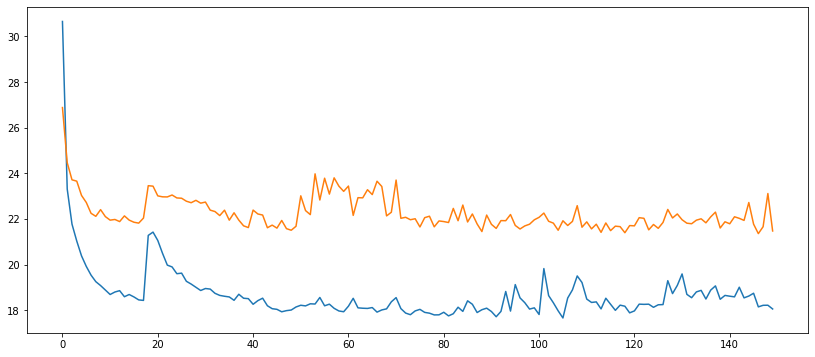

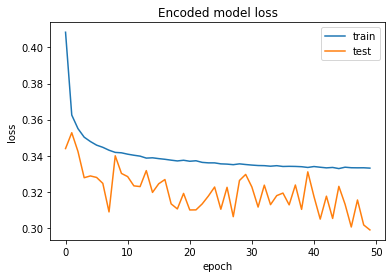

Overall accuracy of Convolutional Neural Network model: 0.8508128225834767


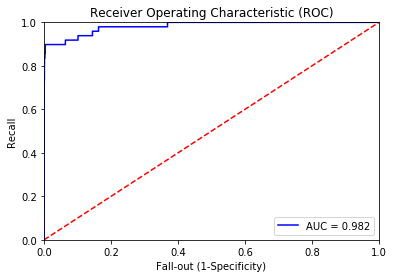

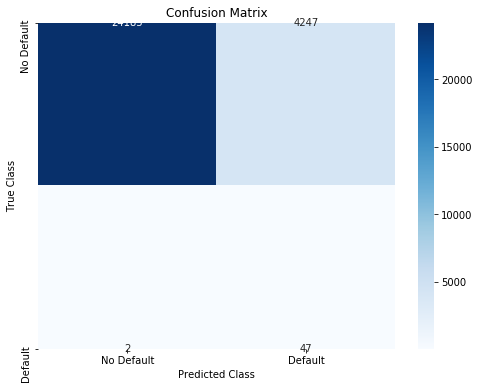

AUC(ROC): 0.9049048643092577
Precision: 0.010945505356311131
Recall: 0.9591836734693877
F1 score: 0.021644024867603036
False positives: 4247
True positives: 47
False negatives: 2
True negatives: 24185
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511746, 30)
After OverSampling, the shape of train_y: (511746,) 

After OverSampling, counts of label '1': 255863
After OverSampling, counts of label '0': 255883
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

511746/511746 [==============================] - 25s 50us/step - loss: 11.8888 - rec_loss: 18.9290 - kl_loss: 4.0119 - val_loss: 13.1281 - val_rec_loss: 22.8941 - val_kl_loss: 2.8942
Epoch 17/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.8521 - rec_loss: 18.8582 - kl_loss: 4.0158 - val_loss: 12.9666 - val_rec_loss: 22.6365 - val_kl_loss: 2.8310
Epoch 18/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.8133 - rec_loss: 18.7718 - kl_loss: 4.0303 - val_loss: 13.2043 - val_rec_loss: 23.0993 - val_kl_loss: 2.8420
Epoch 19/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.8097 - rec_loss: 18.7569 - kl_loss: 4.0401 - val_loss: 12.9001 - val_rec_loss: 22.4875 - val_kl_loss: 2.8466
Epoch 20/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.7763 - rec_loss: 18.6821 - kl_loss: 4.0474 - val_loss: 12.9600 - val_rec_loss: 22.5641 - val_kl_loss: 2.8960
Epoch 21/150
511746/511746 [=====

Epoch 58/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3812 - rec_loss: 17.8317 - kl_loss: 4.1530 - val_loss: 12.6301 - val_rec_loss: 21.8607 - val_kl_loss: 2.9338
Epoch 59/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.4507 - rec_loss: 17.9583 - kl_loss: 4.1641 - val_loss: 12.6747 - val_rec_loss: 22.0223 - val_kl_loss: 2.8831
Epoch 60/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.3741 - rec_loss: 17.8214 - kl_loss: 4.1560 - val_loss: 12.6742 - val_rec_loss: 21.9806 - val_kl_loss: 2.9039
Epoch 61/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3927 - rec_loss: 17.8589 - kl_loss: 4.1584 - val_loss: 12.6944 - val_rec_loss: 21.9891 - val_kl_loss: 2.9561
Epoch 62/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3945 - rec_loss: 17.8612 - kl_loss: 4.1627 - val_loss: 12.8200 - val_rec_loss: 22.3263 - val_kl_loss: 2.8628
Epoch 63/150
511746/

Epoch 100/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.2456 - rec_loss: 17.5696 - kl_loss: 4.1713 - val_loss: 12.6665 - val_rec_loss: 22.0813 - val_kl_loss: 2.8131
Epoch 101/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.3234 - rec_loss: 17.7064 - kl_loss: 4.1836 - val_loss: 12.7925 - val_rec_loss: 22.2563 - val_kl_loss: 2.8788
Epoch 102/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.3564 - rec_loss: 17.7740 - kl_loss: 4.1792 - val_loss: 12.7588 - val_rec_loss: 22.1257 - val_kl_loss: 2.9468
Epoch 103/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.2357 - rec_loss: 17.5432 - kl_loss: 4.1729 - val_loss: 12.9332 - val_rec_loss: 22.3920 - val_kl_loss: 3.0131
Epoch 104/150
511746/511746 [==============================] - 26s 50us/step - loss: 11.3657 - rec_loss: 17.7891 - kl_loss: 4.1792 - val_loss: 12.8431 - val_rec_loss: 22.2606 - val_kl_loss: 2.9859
Epoch 105/150
5

511746/511746 [==============================] - 25s 50us/step - loss: 11.3389 - rec_loss: 17.6817 - kl_loss: 4.2051 - val_loss: 12.9178 - val_rec_loss: 22.4728 - val_kl_loss: 2.8774
Epoch 142/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3781 - rec_loss: 17.7705 - kl_loss: 4.1926 - val_loss: 13.0262 - val_rec_loss: 22.6466 - val_kl_loss: 2.9173
Epoch 143/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3888 - rec_loss: 17.7792 - kl_loss: 4.1948 - val_loss: 12.7091 - val_rec_loss: 22.1432 - val_kl_loss: 2.8028
Epoch 144/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.4536 - rec_loss: 17.9111 - kl_loss: 4.1944 - val_loss: 12.7025 - val_rec_loss: 22.1597 - val_kl_loss: 2.7653
Epoch 145/150
511746/511746 [==============================] - 25s 50us/step - loss: 11.3892 - rec_loss: 17.7799 - kl_loss: 4.1939 - val_loss: 12.8025 - val_rec_loss: 22.1362 - val_kl_loss: 2.9765
Epoch 146/150
511746/511746 [

Epoch 42/50
511746/511746 [==============================] - 92s 180us/step - loss: 0.3418 - accuracy: 0.8459 - val_loss: 0.3097 - val_accuracy: 0.8779
Epoch 43/50
511746/511746 [==============================] - 93s 182us/step - loss: 0.3421 - accuracy: 0.8461 - val_loss: 0.3174 - val_accuracy: 0.8766
Epoch 44/50
511746/511746 [==============================] - 94s 183us/step - loss: 0.3415 - accuracy: 0.8456 - val_loss: 0.3111 - val_accuracy: 0.8807
Epoch 45/50
511746/511746 [==============================] - 94s 183us/step - loss: 0.3423 - accuracy: 0.8458 - val_loss: 0.3051 - val_accuracy: 0.8826
Epoch 46/50
511746/511746 [==============================] - 94s 184us/step - loss: 0.3419 - accuracy: 0.8456 - val_loss: 0.3023 - val_accuracy: 0.8808
Epoch 47/50
511746/511746 [==============================] - 93s 183us/step - loss: 0.3420 - accuracy: 0.8461 - val_loss: 0.3281 - val_accuracy: 0.8762
Epoch 48/50
511746/511746 [==============================] - 92s 180us/step - loss: 0.34

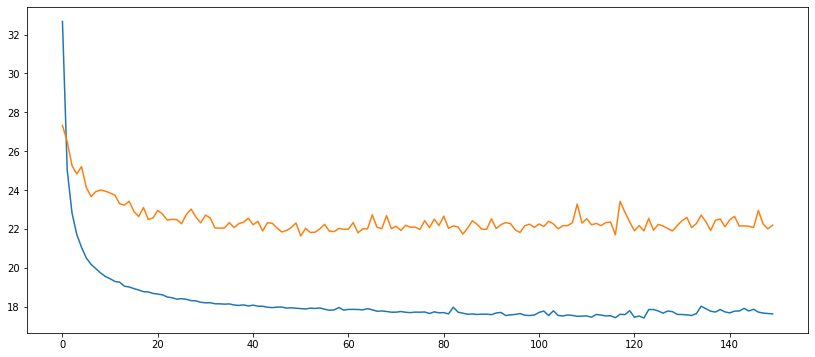

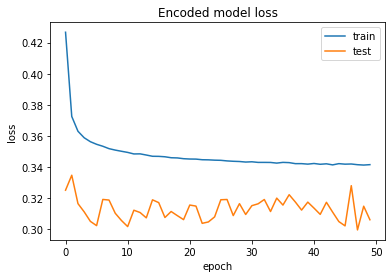

Overall accuracy of Convolutional Neural Network model: 0.8837119483164215


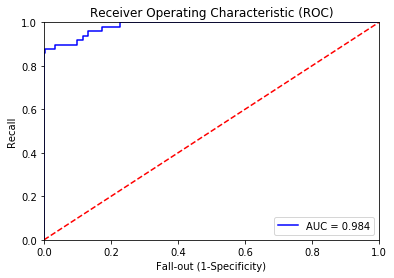

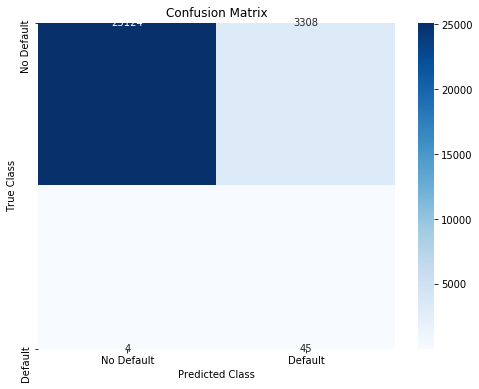

AUC(ROC): 0.9010097848931357
Precision: 0.013420817178645988
Recall: 0.9183673469387755
F1 score: 0.026455026455026457
False positives: 3308
True positives: 45
False negatives: 4
True negatives: 25124
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511775, 30)
After OverSampling, the shape of train_y: (511775,) 

After OverSampling, counts of label '1': 255891
After OverSampling, counts of label '0': 255884
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 27)           108         dense_46[0][0]                   
____________________________________________________________________________________

511775/511775 [==============================] - 26s 50us/step - loss: 11.8370 - rec_loss: 18.9453 - kl_loss: 3.9538 - val_loss: 12.8735 - val_rec_loss: 22.4558 - val_kl_loss: 2.8149
Epoch 17/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.7857 - rec_loss: 18.8267 - kl_loss: 3.9616 - val_loss: 12.7315 - val_rec_loss: 22.1275 - val_kl_loss: 2.8727
Epoch 18/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.7442 - rec_loss: 18.7374 - kl_loss: 3.9820 - val_loss: 12.6528 - val_rec_loss: 21.9794 - val_kl_loss: 2.8569
Epoch 19/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.7319 - rec_loss: 18.6935 - kl_loss: 3.9989 - val_loss: 12.7479 - val_rec_loss: 22.1604 - val_kl_loss: 2.8651
Epoch 20/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.6664 - rec_loss: 18.5588 - kl_loss: 4.0030 - val_loss: 12.6136 - val_rec_loss: 21.9346 - val_kl_loss: 2.8186
Epoch 21/150
511775/511775 [=====

Epoch 58/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.4706 - rec_loss: 17.9976 - kl_loss: 4.1574 - val_loss: 12.5716 - val_rec_loss: 21.6985 - val_kl_loss: 2.9615
Epoch 59/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.4115 - rec_loss: 17.8679 - kl_loss: 4.1667 - val_loss: 12.4293 - val_rec_loss: 21.3897 - val_kl_loss: 2.9855
Epoch 60/150
511775/511775 [==============================] - 26s 51us/step - loss: 11.3798 - rec_loss: 17.8061 - kl_loss: 4.1642 - val_loss: 12.5697 - val_rec_loss: 21.6374 - val_kl_loss: 3.0040
Epoch 61/150
511775/511775 [==============================] - 26s 51us/step - loss: 11.3549 - rec_loss: 17.7584 - kl_loss: 4.1686 - val_loss: 12.6277 - val_rec_loss: 21.7578 - val_kl_loss: 3.0090
Epoch 62/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.3390 - rec_loss: 17.7644 - kl_loss: 4.1502 - val_loss: 12.4936 - val_rec_loss: 21.4838 - val_kl_loss: 3.0225
Epoch 63/150
511775/

Epoch 100/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.3403 - rec_loss: 17.5607 - kl_loss: 4.2581 - val_loss: 12.4167 - val_rec_loss: 21.1439 - val_kl_loss: 3.1508
Epoch 101/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.2854 - rec_loss: 17.4530 - kl_loss: 4.2639 - val_loss: 12.3018 - val_rec_loss: 20.9277 - val_kl_loss: 3.1537
Epoch 102/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.2528 - rec_loss: 17.4388 - kl_loss: 4.2393 - val_loss: 12.4636 - val_rec_loss: 21.3671 - val_kl_loss: 3.0624
Epoch 103/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.2218 - rec_loss: 17.3931 - kl_loss: 4.2484 - val_loss: 12.3563 - val_rec_loss: 21.1224 - val_kl_loss: 3.0844
Epoch 104/150
511775/511775 [==============================] - 26s 50us/step - loss: 11.1877 - rec_loss: 17.3408 - kl_loss: 4.2287 - val_loss: 12.4651 - val_rec_loss: 21.2439 - val_kl_loss: 3.1668
Epoch 105/150
5

511775/511775 [==============================] - 26s 50us/step - loss: 11.6100 - rec_loss: 18.1057 - kl_loss: 4.2352 - val_loss: 13.1194 - val_rec_loss: 22.5302 - val_kl_loss: 3.0743
Epoch 142/150
511775/511775 [==============================] - 26s 50us/step - loss: 12.3578 - rec_loss: 19.4590 - kl_loss: 4.2583 - val_loss: 13.9847 - val_rec_loss: 24.0918 - val_kl_loss: 3.1326
Epoch 143/150
511775/511775 [==============================] - 26s 50us/step - loss: 12.7328 - rec_loss: 20.3035 - kl_loss: 4.1220 - val_loss: 13.3649 - val_rec_loss: 22.9146 - val_kl_loss: 3.0749
Epoch 144/150
511775/511775 [==============================] - 26s 50us/step - loss: 12.6837 - rec_loss: 20.1832 - kl_loss: 4.1544 - val_loss: 13.3596 - val_rec_loss: 22.9521 - val_kl_loss: 3.0755
Epoch 145/150
511775/511775 [==============================] - 26s 50us/step - loss: 12.4240 - rec_loss: 19.7763 - kl_loss: 4.0780 - val_loss: 13.0113 - val_rec_loss: 22.3956 - val_kl_loss: 2.9490
Epoch 146/150
511775/511775 [

Epoch 42/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3136 - accuracy: 0.8722 - val_loss: 0.3097 - val_accuracy: 0.8449
Epoch 43/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3137 - accuracy: 0.8724 - val_loss: 0.3061 - val_accuracy: 0.8425
Epoch 44/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3138 - accuracy: 0.8724 - val_loss: 0.3098 - val_accuracy: 0.8431
Epoch 45/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3136 - accuracy: 0.8727 - val_loss: 0.3120 - val_accuracy: 0.8426
Epoch 46/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3137 - accuracy: 0.8725 - val_loss: 0.3005 - val_accuracy: 0.8484
Epoch 47/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.3137 - accuracy: 0.8726 - val_loss: 0.2998 - val_accuracy: 0.8465
Epoch 48/50
511775/511775 [==============================] - 90s 175us/step - loss: 0.31

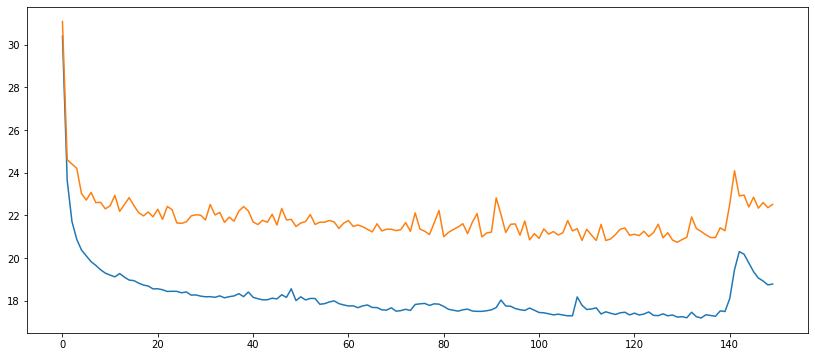

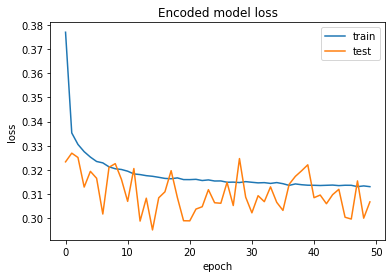

Overall accuracy of Convolutional Neural Network model: 0.8456514869562164


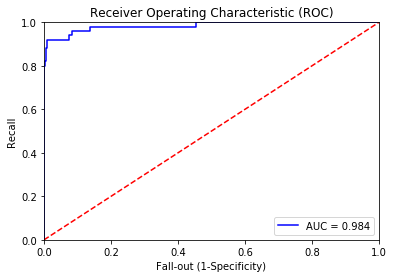

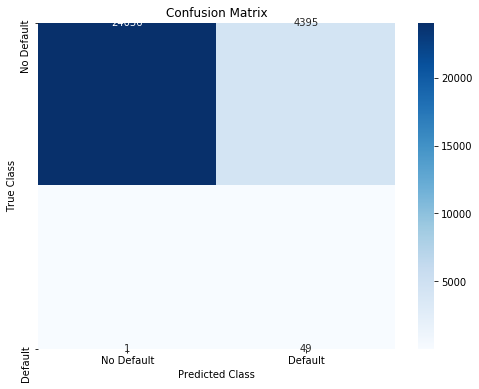

AUC(ROC): 0.912707607892793
Precision: 0.011026102610261027
Recall: 0.98
F1 score: 0.02180685358255452
False positives: 4395
True positives: 49
False negatives: 1
True negatives: 24036
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511733, 30)
After OverSampling, the shape of train_y: (511733,) 

After OverSampling, counts of label '1': 255849
After OverSampling, counts of label '0': 255884
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 27)           108         dense_55[0][0]                   
____________________________________________________________________________________

511733/511733 [==============================] - 26s 50us/step - loss: 12.0162 - rec_loss: 19.1777 - kl_loss: 3.9704 - val_loss: 13.2455 - val_rec_loss: 23.1992 - val_kl_loss: 2.8324
Epoch 17/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.0264 - rec_loss: 19.2086 - kl_loss: 3.9670 - val_loss: 12.9007 - val_rec_loss: 22.5609 - val_kl_loss: 2.7707
Epoch 18/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9683 - rec_loss: 19.0852 - kl_loss: 3.9725 - val_loss: 12.7681 - val_rec_loss: 22.4073 - val_kl_loss: 2.6849
Epoch 19/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9351 - rec_loss: 19.0392 - kl_loss: 3.9738 - val_loss: 12.7632 - val_rec_loss: 22.2503 - val_kl_loss: 2.8228
Epoch 20/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9122 - rec_loss: 18.9775 - kl_loss: 3.9850 - val_loss: 12.7128 - val_rec_loss: 22.1495 - val_kl_loss: 2.8202
Epoch 21/150
511733/511733 [=====

Epoch 58/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.7199 - rec_loss: 18.5122 - kl_loss: 4.0683 - val_loss: 12.5409 - val_rec_loss: 21.6962 - val_kl_loss: 2.8960
Epoch 59/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.7257 - rec_loss: 18.4979 - kl_loss: 4.0828 - val_loss: 12.6250 - val_rec_loss: 21.8146 - val_kl_loss: 2.9216
Epoch 60/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.7337 - rec_loss: 18.5007 - kl_loss: 4.0789 - val_loss: 12.5181 - val_rec_loss: 21.6161 - val_kl_loss: 2.9189
Epoch 61/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.6238 - rec_loss: 18.3177 - kl_loss: 4.0859 - val_loss: 12.6267 - val_rec_loss: 21.8021 - val_kl_loss: 2.9658
Epoch 62/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.6562 - rec_loss: 18.3632 - kl_loss: 4.0924 - val_loss: 12.7922 - val_rec_loss: 22.1415 - val_kl_loss: 2.8974
Epoch 63/150
511733/

Epoch 100/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.6453 - rec_loss: 19.9326 - kl_loss: 4.1784 - val_loss: 13.2525 - val_rec_loss: 22.7448 - val_kl_loss: 2.9389
Epoch 101/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.5766 - rec_loss: 19.7227 - kl_loss: 4.2186 - val_loss: 13.2236 - val_rec_loss: 22.5327 - val_kl_loss: 3.0925
Epoch 102/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.5185 - rec_loss: 19.6472 - kl_loss: 4.1829 - val_loss: 13.0606 - val_rec_loss: 22.3010 - val_kl_loss: 3.0064
Epoch 103/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.5153 - rec_loss: 19.6833 - kl_loss: 4.1743 - val_loss: 13.0233 - val_rec_loss: 22.3724 - val_kl_loss: 2.9155
Epoch 104/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.4439 - rec_loss: 19.5613 - kl_loss: 4.1610 - val_loss: 13.0922 - val_rec_loss: 22.3517 - val_kl_loss: 3.0351
Epoch 105/150
5

511733/511733 [==============================] - 26s 50us/step - loss: 12.1967 - rec_loss: 19.1570 - kl_loss: 4.2046 - val_loss: 13.1741 - val_rec_loss: 22.5417 - val_kl_loss: 3.0897
Epoch 142/150
511733/511733 [==============================] - 26s 50us/step - loss: 12.0098 - rec_loss: 18.8250 - kl_loss: 4.1417 - val_loss: 12.9682 - val_rec_loss: 22.5325 - val_kl_loss: 2.6792
Epoch 143/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9861 - rec_loss: 18.8232 - kl_loss: 4.1017 - val_loss: 12.9378 - val_rec_loss: 22.2274 - val_kl_loss: 2.9815
Epoch 144/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9866 - rec_loss: 18.7920 - kl_loss: 4.1375 - val_loss: 12.9887 - val_rec_loss: 22.3077 - val_kl_loss: 3.0152
Epoch 145/150
511733/511733 [==============================] - 26s 50us/step - loss: 11.9367 - rec_loss: 18.7496 - kl_loss: 4.1345 - val_loss: 12.7626 - val_rec_loss: 22.0640 - val_kl_loss: 2.8687
Epoch 146/150
511733/511733 [

Epoch 42/50
511733/511733 [==============================] - 92s 181us/step - loss: 0.3207 - accuracy: 0.8637 - val_loss: 0.3023 - val_accuracy: 0.8438
Epoch 43/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.3210 - accuracy: 0.8633 - val_loss: 0.2853 - val_accuracy: 0.8482
Epoch 44/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.3207 - accuracy: 0.8640 - val_loss: 0.2896 - val_accuracy: 0.8441
Epoch 45/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.3208 - accuracy: 0.8638 - val_loss: 0.2952 - val_accuracy: 0.8439
Epoch 46/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.3212 - accuracy: 0.8636 - val_loss: 0.2912 - val_accuracy: 0.8510
Epoch 47/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.3211 - accuracy: 0.8637 - val_loss: 0.2917 - val_accuracy: 0.8453
Epoch 48/50
511733/511733 [==============================] - 92s 180us/step - loss: 0.32

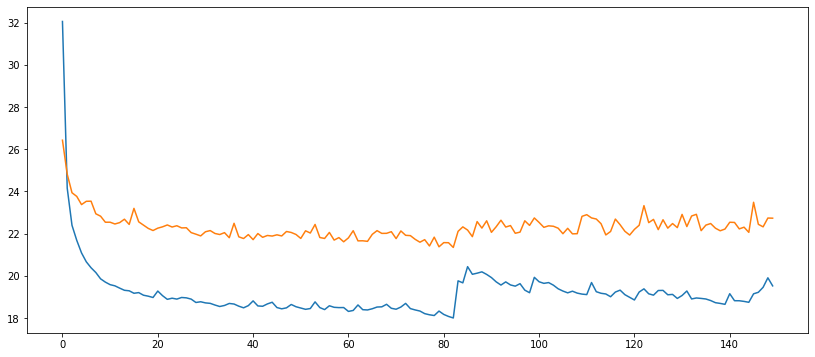

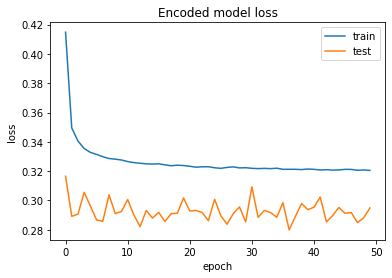

Overall accuracy of Convolutional Neural Network model: 0.8480039324461922


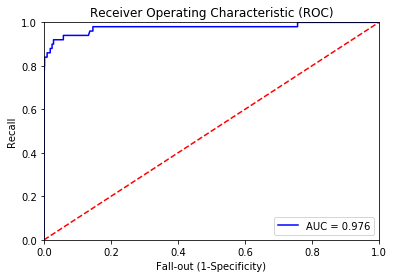

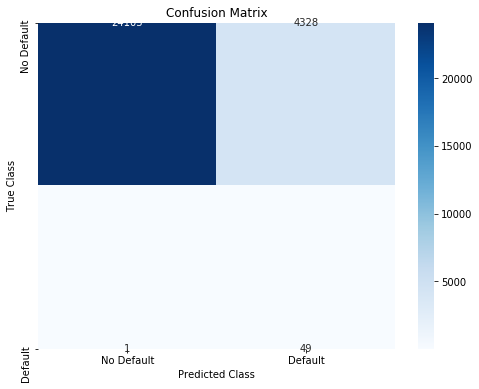

AUC(ROC): 0.9138858991945411
Precision: 0.011194882339501942
Recall: 0.98
F1 score: 0.022136887282584145
False positives: 4328
True positives: 49
False negatives: 1
True negatives: 24103
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511738, 30)
After OverSampling, the shape of train_y: (511738,) 

After OverSampling, counts of label '1': 255854
After OverSampling, counts of label '0': 255884
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 27)           108         dense_64[0][0]                   
____________________________________________________________________________________

511738/511738 [==============================] - 26s 51us/step - loss: 11.8964 - rec_loss: 18.8841 - kl_loss: 4.1046 - val_loss: 13.0118 - val_rec_loss: 22.5586 - val_kl_loss: 2.9933
Epoch 17/150
511738/511738 [==============================] - 26s 51us/step - loss: 11.8629 - rec_loss: 18.8229 - kl_loss: 4.0972 - val_loss: 13.0030 - val_rec_loss: 22.7025 - val_kl_loss: 2.8314
Epoch 18/150
511738/511738 [==============================] - 26s 51us/step - loss: 11.8521 - rec_loss: 18.7880 - kl_loss: 4.0998 - val_loss: 13.0116 - val_rec_loss: 22.6179 - val_kl_loss: 2.9469
Epoch 19/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.8011 - rec_loss: 18.6782 - kl_loss: 4.1103 - val_loss: 12.9506 - val_rec_loss: 22.4874 - val_kl_loss: 2.9385
Epoch 20/150
511738/511738 [==============================] - 26s 51us/step - loss: 11.9126 - rec_loss: 18.9152 - kl_loss: 4.0911 - val_loss: 13.1535 - val_rec_loss: 22.9074 - val_kl_loss: 2.9230
Epoch 21/150
511738/511738 [=====

Epoch 58/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.4564 - rec_loss: 17.9750 - kl_loss: 4.1764 - val_loss: 12.5182 - val_rec_loss: 21.5147 - val_kl_loss: 3.0545
Epoch 59/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.4572 - rec_loss: 17.9820 - kl_loss: 4.1692 - val_loss: 12.7160 - val_rec_loss: 21.9804 - val_kl_loss: 2.9843
Epoch 60/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.4787 - rec_loss: 18.0056 - kl_loss: 4.1829 - val_loss: 12.6170 - val_rec_loss: 21.7872 - val_kl_loss: 2.9638
Epoch 61/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.5438 - rec_loss: 18.1313 - kl_loss: 4.1838 - val_loss: 12.8101 - val_rec_loss: 22.1037 - val_kl_loss: 3.0367
Epoch 62/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.4655 - rec_loss: 17.9709 - kl_loss: 4.1826 - val_loss: 12.7311 - val_rec_loss: 21.9609 - val_kl_loss: 3.0226
Epoch 63/150
511738/

Epoch 100/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3585 - rec_loss: 17.7236 - kl_loss: 4.1932 - val_loss: 12.7649 - val_rec_loss: 21.9553 - val_kl_loss: 3.0785
Epoch 101/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3653 - rec_loss: 17.7127 - kl_loss: 4.2054 - val_loss: 12.6771 - val_rec_loss: 21.8224 - val_kl_loss: 3.0268
Epoch 102/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3328 - rec_loss: 17.6471 - kl_loss: 4.2056 - val_loss: 12.6143 - val_rec_loss: 21.7946 - val_kl_loss: 2.9357
Epoch 103/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3495 - rec_loss: 17.6838 - kl_loss: 4.2037 - val_loss: 12.6350 - val_rec_loss: 21.7232 - val_kl_loss: 3.0421
Epoch 104/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.4464 - rec_loss: 17.8698 - kl_loss: 4.2039 - val_loss: 12.5036 - val_rec_loss: 21.5204 - val_kl_loss: 2.9757
Epoch 105/150
5

511738/511738 [==============================] - 25s 50us/step - loss: 11.2800 - rec_loss: 17.5102 - kl_loss: 4.2193 - val_loss: 12.5884 - val_rec_loss: 21.6945 - val_kl_loss: 2.9685
Epoch 142/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3024 - rec_loss: 17.5389 - kl_loss: 4.2333 - val_loss: 12.4759 - val_rec_loss: 21.4499 - val_kl_loss: 2.9920
Epoch 143/150
511738/511738 [==============================] - 26s 50us/step - loss: 11.3037 - rec_loss: 17.5719 - kl_loss: 4.2149 - val_loss: 12.4092 - val_rec_loss: 21.2531 - val_kl_loss: 3.0638
Epoch 144/150
511738/511738 [==============================] - 25s 50us/step - loss: 11.3490 - rec_loss: 17.6514 - kl_loss: 4.2180 - val_loss: 12.5629 - val_rec_loss: 21.6194 - val_kl_loss: 2.9838
Epoch 145/150
511738/511738 [==============================] - 25s 50us/step - loss: 11.2985 - rec_loss: 17.5700 - kl_loss: 4.2073 - val_loss: 12.3062 - val_rec_loss: 21.1419 - val_kl_loss: 2.9754
Epoch 146/150
511738/511738 [

Epoch 42/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3302 - accuracy: 0.8670 - val_loss: 0.2846 - val_accuracy: 0.8708
Epoch 43/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3304 - accuracy: 0.8671 - val_loss: 0.2860 - val_accuracy: 0.8685
Epoch 44/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3302 - accuracy: 0.8669 - val_loss: 0.2758 - val_accuracy: 0.8737
Epoch 45/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3304 - accuracy: 0.8669 - val_loss: 0.2747 - val_accuracy: 0.8732
Epoch 46/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3300 - accuracy: 0.8670 - val_loss: 0.2904 - val_accuracy: 0.8708
Epoch 47/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.3299 - accuracy: 0.8670 - val_loss: 0.2878 - val_accuracy: 0.8718
Epoch 48/50
511738/511738 [==============================] - 95s 185us/step - loss: 0.33

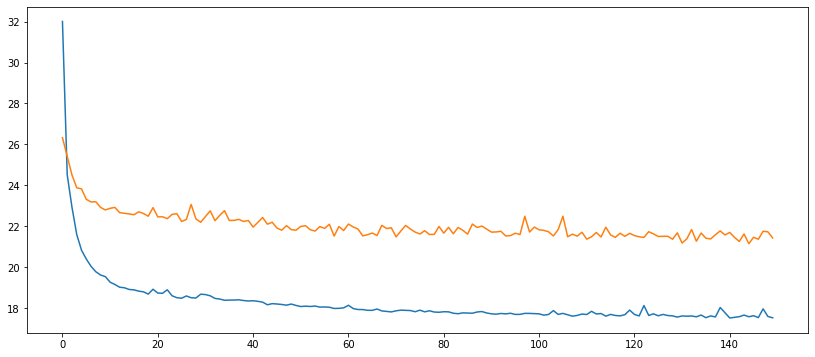

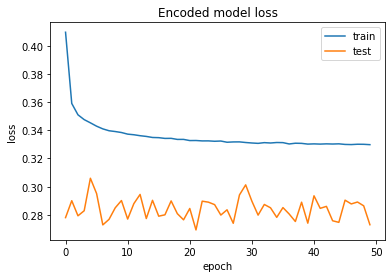

Overall accuracy of Convolutional Neural Network model: 0.8742626404494382


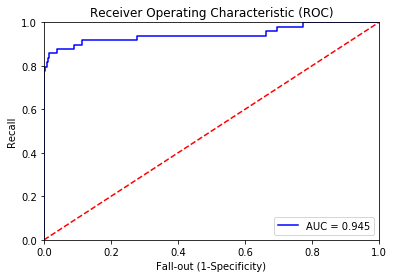

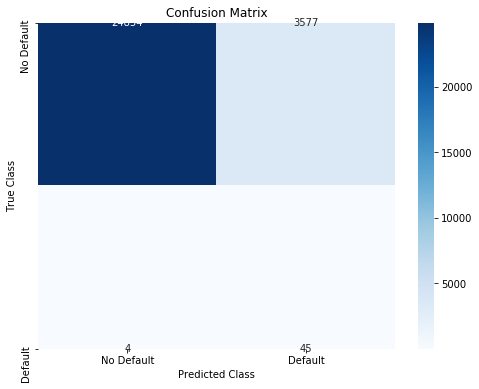

AUC(ROC): 0.8962769871059111
Precision: 0.012424075096631695
Recall: 0.9183673469387755
F1 score: 0.02451648052301825
False positives: 3577
True positives: 45
False negatives: 4
True negatives: 24854
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511805, 30)
After OverSampling, the shape of train_y: (511805,) 

After OverSampling, counts of label '1': 255921
After OverSampling, counts of label '0': 255884
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 27)           108         dense_73[0][0]                   
____________________________________________________________________________________

511805/511805 [==============================] - 26s 51us/step - loss: 11.5010 - rec_loss: 18.3405 - kl_loss: 3.9623 - val_loss: 12.5148 - val_rec_loss: 21.7840 - val_kl_loss: 2.8375
Epoch 17/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.4648 - rec_loss: 18.2716 - kl_loss: 3.9655 - val_loss: 12.3403 - val_rec_loss: 21.4788 - val_kl_loss: 2.7954
Epoch 18/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.4211 - rec_loss: 18.1749 - kl_loss: 3.9667 - val_loss: 12.3649 - val_rec_loss: 21.4869 - val_kl_loss: 2.8437
Epoch 19/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3926 - rec_loss: 18.1234 - kl_loss: 3.9699 - val_loss: 12.2533 - val_rec_loss: 21.2992 - val_kl_loss: 2.7928
Epoch 20/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3901 - rec_loss: 18.1020 - kl_loss: 3.9768 - val_loss: 12.2036 - val_rec_loss: 21.1825 - val_kl_loss: 2.8109
Epoch 21/150
511805/511805 [=====

Epoch 58/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.4263 - rec_loss: 17.9874 - kl_loss: 4.0687 - val_loss: 12.2255 - val_rec_loss: 21.0981 - val_kl_loss: 2.8593
Epoch 59/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3958 - rec_loss: 17.9080 - kl_loss: 4.0930 - val_loss: 12.3554 - val_rec_loss: 21.1610 - val_kl_loss: 3.0384
Epoch 60/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3626 - rec_loss: 17.8344 - kl_loss: 4.0986 - val_loss: 12.2690 - val_rec_loss: 21.1810 - val_kl_loss: 2.8532
Epoch 61/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.2368 - rec_loss: 17.7001 - kl_loss: 4.0241 - val_loss: 12.4140 - val_rec_loss: 21.5037 - val_kl_loss: 2.8634
Epoch 62/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3145 - rec_loss: 17.8175 - kl_loss: 4.0564 - val_loss: 12.3857 - val_rec_loss: 21.2015 - val_kl_loss: 3.1035
Epoch 63/150
511805/

Epoch 100/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.2096 - rec_loss: 17.4674 - kl_loss: 4.1644 - val_loss: 12.3132 - val_rec_loss: 21.0509 - val_kl_loss: 3.0635
Epoch 101/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.2383 - rec_loss: 17.5598 - kl_loss: 4.1500 - val_loss: 12.0899 - val_rec_loss: 20.6866 - val_kl_loss: 2.9903
Epoch 102/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.1620 - rec_loss: 17.3858 - kl_loss: 4.1706 - val_loss: 12.2944 - val_rec_loss: 20.8801 - val_kl_loss: 3.1873
Epoch 103/150
511805/511805 [==============================] - 26s 52us/step - loss: 11.1376 - rec_loss: 17.3142 - kl_loss: 4.1751 - val_loss: 12.1593 - val_rec_loss: 20.5713 - val_kl_loss: 3.2025
Epoch 104/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3451 - rec_loss: 17.5595 - kl_loss: 4.2775 - val_loss: 12.6082 - val_rec_loss: 21.3275 - val_kl_loss: 3.2579
Epoch 105/150
5

511805/511805 [==============================] - 26s 51us/step - loss: 11.3870 - rec_loss: 17.6571 - kl_loss: 4.2513 - val_loss: 12.9960 - val_rec_loss: 21.8154 - val_kl_loss: 3.5360
Epoch 142/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.3489 - rec_loss: 17.5676 - kl_loss: 4.2547 - val_loss: 12.4777 - val_rec_loss: 21.2849 - val_kl_loss: 3.0771
Epoch 143/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.2585 - rec_loss: 17.5363 - kl_loss: 4.1634 - val_loss: 12.2563 - val_rec_loss: 20.8789 - val_kl_loss: 3.0816
Epoch 144/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.1168 - rec_loss: 17.2905 - kl_loss: 4.1518 - val_loss: 12.2353 - val_rec_loss: 20.8679 - val_kl_loss: 3.0947
Epoch 145/150
511805/511805 [==============================] - 26s 51us/step - loss: 11.0879 - rec_loss: 17.2513 - kl_loss: 4.1478 - val_loss: 12.2652 - val_rec_loss: 20.9330 - val_kl_loss: 3.0913
Epoch 146/150
511805/511805 [

Epoch 42/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3544 - accuracy: 0.8498 - val_loss: 0.3083 - val_accuracy: 0.8748
Epoch 43/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3538 - accuracy: 0.8501 - val_loss: 0.3078 - val_accuracy: 0.8756
Epoch 44/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3540 - accuracy: 0.8500 - val_loss: 0.2973 - val_accuracy: 0.8782
Epoch 45/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3539 - accuracy: 0.8498 - val_loss: 0.3053 - val_accuracy: 0.8755
Epoch 46/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3534 - accuracy: 0.8500 - val_loss: 0.2914 - val_accuracy: 0.8781
Epoch 47/50
511805/511805 [==============================] - 91s 178us/step - loss: 0.3533 - accuracy: 0.8504 - val_loss: 0.3055 - val_accuracy: 0.8763
Epoch 48/50
511805/511805 [==============================] - 91s 177us/step - loss: 0.35

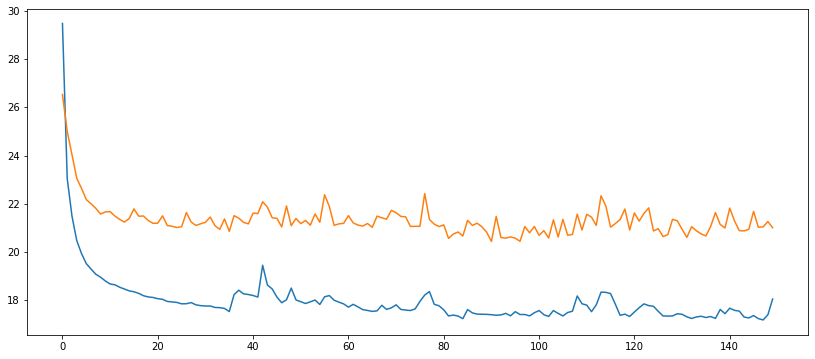

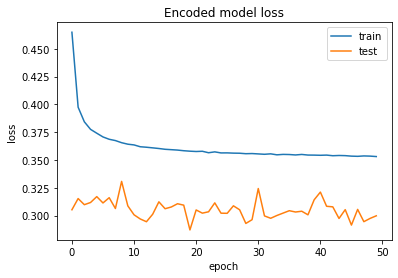

Overall accuracy of Convolutional Neural Network model: 0.8762640449438203


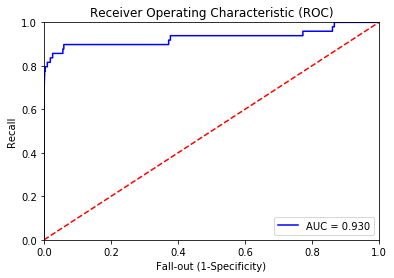

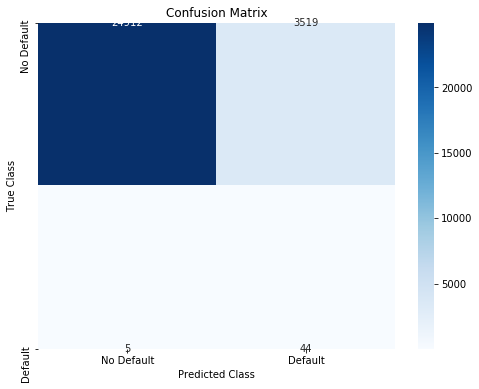

AUC(ROC): 0.8870929188389506
Precision: 0.01234914397979231
Recall: 0.8979591836734694
F1 score: 0.024363233665559245
False positives: 3519
True positives: 44
False negatives: 5
True negatives: 24912
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511725, 30)
After OverSampling, the shape of train_y: (511725,) 

After OverSampling, counts of label '1': 255841
After OverSampling, counts of label '0': 255884
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 27)           108         dense_82[0][0]                   
____________________________________________________________________________________

511725/511725 [==============================] - 26s 51us/step - loss: 11.5044 - rec_loss: 18.1804 - kl_loss: 4.0509 - val_loss: 12.5939 - val_rec_loss: 21.7743 - val_kl_loss: 2.9901
Epoch 17/150
511725/511725 [==============================] - 26s 51us/step - loss: 11.5036 - rec_loss: 18.1690 - kl_loss: 4.0617 - val_loss: 12.6165 - val_rec_loss: 21.8524 - val_kl_loss: 2.9607
Epoch 18/150
511725/511725 [==============================] - 26s 51us/step - loss: 11.4633 - rec_loss: 18.0956 - kl_loss: 4.0580 - val_loss: 12.6928 - val_rec_loss: 21.8850 - val_kl_loss: 3.0864
Epoch 19/150
511725/511725 [==============================] - 26s 51us/step - loss: 11.4315 - rec_loss: 18.0281 - kl_loss: 4.0641 - val_loss: 12.6370 - val_rec_loss: 21.8529 - val_kl_loss: 2.9901
Epoch 20/150
511725/511725 [==============================] - 26s 51us/step - loss: 11.4137 - rec_loss: 17.9960 - kl_loss: 4.0656 - val_loss: 12.6548 - val_rec_loss: 21.9265 - val_kl_loss: 2.9785
Epoch 21/150
511725/511725 [=====

Epoch 58/150
511725/511725 [==============================] - 26s 52us/step - loss: 11.2162 - rec_loss: 17.5823 - kl_loss: 4.1425 - val_loss: 12.5927 - val_rec_loss: 21.6444 - val_kl_loss: 3.1195
Epoch 59/150
511725/511725 [==============================] - 26s 51us/step - loss: 11.1032 - rec_loss: 17.3594 - kl_loss: 4.1446 - val_loss: 12.5825 - val_rec_loss: 21.5968 - val_kl_loss: 3.1542
Epoch 60/150
511725/511725 [==============================] - 27s 53us/step - loss: 11.2458 - rec_loss: 17.6323 - kl_loss: 4.1435 - val_loss: 12.5474 - val_rec_loss: 21.6125 - val_kl_loss: 3.0622
Epoch 61/150
511725/511725 [==============================] - 27s 52us/step - loss: 11.0817 - rec_loss: 17.3125 - kl_loss: 4.1441 - val_loss: 12.5533 - val_rec_loss: 21.5779 - val_kl_loss: 3.1102
Epoch 62/150
511725/511725 [==============================] - 27s 53us/step - loss: 11.2179 - rec_loss: 17.5801 - kl_loss: 4.1431 - val_loss: 12.6559 - val_rec_loss: 21.7983 - val_kl_loss: 3.0980
Epoch 63/150
511725/

Epoch 100/150
511725/511725 [==============================] - 29s 57us/step - loss: 11.0277 - rec_loss: 17.1835 - kl_loss: 4.2066 - val_loss: 12.7323 - val_rec_loss: 21.9361 - val_kl_loss: 3.1507
Epoch 101/150
511725/511725 [==============================] - 29s 56us/step - loss: 11.0474 - rec_loss: 17.2122 - kl_loss: 4.2113 - val_loss: 12.5635 - val_rec_loss: 21.6369 - val_kl_loss: 3.1141
Epoch 102/150
511725/511725 [==============================] - 29s 57us/step - loss: 11.0288 - rec_loss: 17.1732 - kl_loss: 4.2160 - val_loss: 12.5103 - val_rec_loss: 21.5489 - val_kl_loss: 3.0792
Epoch 103/150
511725/511725 [==============================] - 29s 57us/step - loss: 11.0288 - rec_loss: 17.1855 - kl_loss: 4.2028 - val_loss: 12.4999 - val_rec_loss: 21.4418 - val_kl_loss: 3.1607
Epoch 104/150
511725/511725 [==============================] - 29s 56us/step - loss: 11.0249 - rec_loss: 17.1671 - kl_loss: 4.2132 - val_loss: 12.6149 - val_rec_loss: 21.7105 - val_kl_loss: 3.1339
Epoch 105/150
5

511725/511725 [==============================] - 28s 55us/step - loss: 10.9656 - rec_loss: 17.0301 - kl_loss: 4.2333 - val_loss: 12.5622 - val_rec_loss: 21.5339 - val_kl_loss: 3.1977
Epoch 142/150
511725/511725 [==============================] - 28s 55us/step - loss: 10.9577 - rec_loss: 17.0239 - kl_loss: 4.2304 - val_loss: 12.6210 - val_rec_loss: 21.7350 - val_kl_loss: 3.1343
Epoch 143/150
511725/511725 [==============================] - 28s 55us/step - loss: 11.0500 - rec_loss: 17.2092 - kl_loss: 4.2258 - val_loss: 12.6466 - val_rec_loss: 21.6840 - val_kl_loss: 3.2201
Epoch 144/150
511725/511725 [==============================] - 28s 55us/step - loss: 10.9367 - rec_loss: 16.9715 - kl_loss: 4.2329 - val_loss: 12.4494 - val_rec_loss: 21.4110 - val_kl_loss: 3.1019
Epoch 145/150
511725/511725 [==============================] - 28s 55us/step - loss: 11.0221 - rec_loss: 17.1427 - kl_loss: 4.2357 - val_loss: 12.4486 - val_rec_loss: 21.3459 - val_kl_loss: 3.1759
Epoch 146/150
511725/511725 [

511725/511725 [==============================] - 107s 210us/step - loss: 0.3306 - accuracy: 0.8573 - val_loss: 0.3052 - val_accuracy: 0.8579
Epoch 42/50
511725/511725 [==============================] - 108s 210us/step - loss: 0.3305 - accuracy: 0.8575 - val_loss: 0.3005 - val_accuracy: 0.8579
Epoch 43/50
511725/511725 [==============================] - 108s 211us/step - loss: 0.3301 - accuracy: 0.8577 - val_loss: 0.3028 - val_accuracy: 0.8571
Epoch 44/50
511725/511725 [==============================] - 107s 209us/step - loss: 0.3304 - accuracy: 0.8578 - val_loss: 0.3052 - val_accuracy: 0.8566
Epoch 45/50
511725/511725 [==============================] - 108s 211us/step - loss: 0.3304 - accuracy: 0.8578 - val_loss: 0.2939 - val_accuracy: 0.8587
Epoch 46/50
511725/511725 [==============================] - 108s 210us/step - loss: 0.3307 - accuracy: 0.8576 - val_loss: 0.2953 - val_accuracy: 0.8581
Epoch 47/50
511725/511725 [==============================] - 108s 211us/step - loss: 0.3299 - 

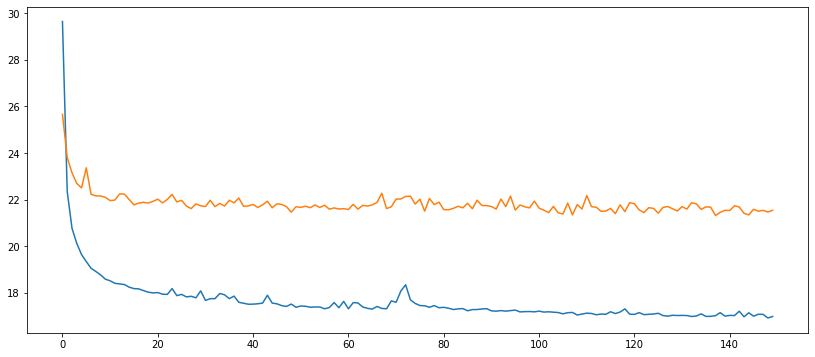

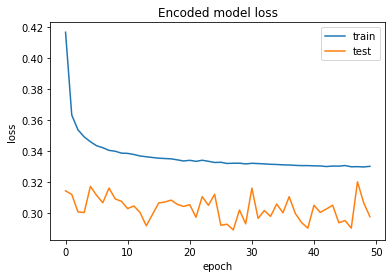

Overall accuracy of Convolutional Neural Network model: 0.8612008426966292


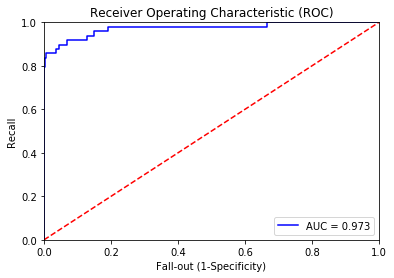

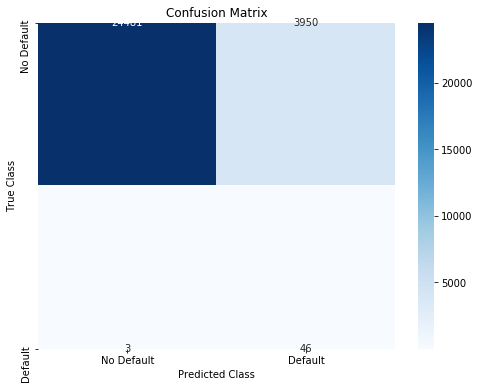

AUC(ROC): 0.899921327610922
Precision: 0.011511511511511512
Recall: 0.9387755102040817
F1 score: 0.022744128553770088
False positives: 3950
True positives: 46
False negatives: 3
True negatives: 24481


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 24613.5
Average fp = 3818.0
Average fn = 2.9
Average tp = 46.3
Average Precision = 1.20%
Average Recall = 94.11%
Average F1 score = 2.37%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 246135
Total fp: 38180
 Total fn:29
 Total tp:463
Total Precision = 0.011981471417850581
Total Recall = 0.9410569105691057
Total F1_score = 0.023661683914654404
